# Parzen-Rosenblatt Density Estimator


In [1]:
import numpy as np
import seaborn as sns

## Data generating function
Used for generating data with or without noise with different types of distribution

### Distributions

In [2]:
def normal_dist(x, y, number_of_points, mean=4, sigma=0.5):
    return np.random.normal([left_bound, right_bound], [1, 0.01], (number_of_points, ))

In [3]:
def normal_dist(number_of_points):
    return np.random.normal([0,0], [1, 0.01], size=(number_of_points, 2))

In [4]:
def logistic_dist(number_of_points):
    return np.random.logistic([0,0], [1, 0.01], size=(number_of_points, 2))

In [5]:
def lognormal_dist(number_of_points):
    return np.random.lognormal(size=(number_of_points, 2))

In [6]:
def exponential_dist(number_of_points):
    return np.random.exponential(size=(number_of_points, 2))

In [7]:
def uniform_dist(number_of_points):
    return np.random.uniform([-4, -4], [4, 4], size=(number_of_points, 2))

### Generation

In [8]:
def generate_data(number_of_points=10000, dist=normal_dist):
    """
    generate distribution of points 
    dist = normal_dist, logistic_dist, lognormal_dist, exponential_dist, uniform_dist
    
    return -> np.ndarray[X,Y]
    """
    X = dist(number_of_points)
    return X

## Kernels
1. Uniform
2. Triangle
3. Epanechnikov
4. Quartic
5. Gaussuian

#### Uniform Kernel $[|r| \leq 1]$

In [9]:
def uniform_kernel(x, x0, l, h=1.0) -> np.ndarray:
    # initialize weights
    weights = np.zeros(x.shape)
    r = np.abs((x - x0)/h/l)
    
    # find where r <= 1
    indx = np.where(r <= 1)
    weights[indx] = 1
    return weights
    

#### Triangle Kernel $(1 - |r|)\;[|r|\leq1]$

In [10]:
def triangle_kernel(x, x0, l, h=1.0) -> np.ndarray:
    # initialize weights
    weights = np.zeros(x.shape)
    r = np.abs((x - x0)/h/l)
    
    # find where r <= 1
    indx = np.where(r <= 1)
   
    weights[indx] = (1 - r[indx])
    return weights

#### Epanechnikov Kernel $(1- r^2)\;[|r|\leq1]$

In [11]:
def epanechnikov_kernel(x, x0, l, h=1.0) -> np.ndarray:
    # initialize weights
    weights = np.zeros(x.shape)
    r_abs = np.abs((x - x0)/h/l)
    r  = (x - x0) / h / l
    
    # find where r <= 1
    indx = np.where(r_abs <= 1)
    weights[indx] = (1 - r[indx]**2)
    return weights

#### Quartic Kernel $(1-r^2)^2\;[|r|\leq1]$

In [12]:
def quartic_kernel(x, x0, l, h=1.0) -> np.ndarray:
    # initialize weights
    weights = np.zeros(x.shape)
    r = np.abs((x - x0)/h/l)
    
    # find where r <= 1
    indx = np.where(r <= 1)
    weights[indx] = (1 - r[indx]**2)**2
    return weights

#### Gaussian Kernel $exp(-2r^2)$

In [13]:
def gaussian_kernel(x, x0, l, h=1.0) -> np.ndarray:
    # initialize weights
    weights = np.zeros(x.shape)
    r = (x - x0) / h / l
    
    weights = np.exp(-2*r**2)
    
    return weights

## Parzen-Rosenblatt estimator 

In [14]:
def parzen_rosenblatt_estimator(data, kernel=epanechnikov_kernel, h=1.0):
    length = len(data)
    density = np.zeros((length,2))
    
    # Initialize all weight from the choosen kernel function
    w = np.array([kernel(data, data[i], h, length) for i in range(length)])
    
    # P-S estimation 
    for i in range(length):
        density[i,0] = np.sum(w[i,:,0])
        density[i,1] = np.sum(w[i,:,1])
        #density[i] = np.sum(w[i]) / length / h
    
    return density/length/h/length

## Let's plot some data!

In [15]:
# Generate data from distrs
X1 = generate_data(dist=normal_dist)
X2 = generate_data(dist=logistic_dist)
X3 = generate_data(dist=lognormal_dist)
X4 = generate_data(dist=exponential_dist)
X5 = generate_data(dist=uniform_dist)

In [16]:
# Find their density it might take a while
d1 = parzen_rosenblatt_estimator(X1, kernel=epanechnikov_kernel, h=1.0)
d2 = parzen_rosenblatt_estimator(X2, kernel=epanechnikov_kernel, h=1.0)
d3 = parzen_rosenblatt_estimator(X3, kernel=epanechnikov_kernel, h=1.0)
d4 = parzen_rosenblatt_estimator(X4, kernel=epanechnikov_kernel, h=1.0)
d5 = parzen_rosenblatt_estimator(X5, kernel=epanechnikov_kernel, h=1.0)

<AxesSubplot:ylabel='Count'>

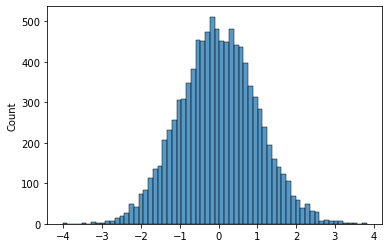

In [17]:
sns.histplot(x=X1.T[0])

<AxesSubplot:ylabel='Count'>

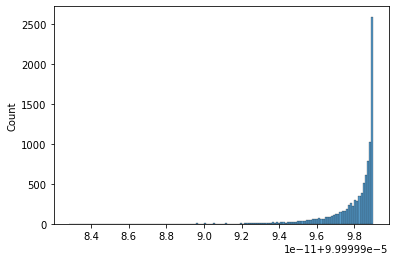

In [18]:
sns.histplot(x=d1.T[0])

In [19]:
np.sum(d5.T[1])

0.9999998920430919